In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Dataset/train.txt', header=None, sep=';', names=['content','emotion'], encoding='utf-8')


df

,content,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

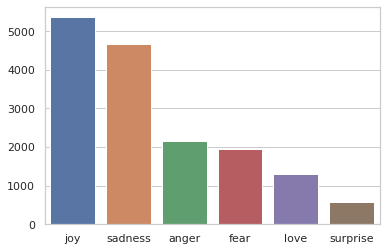

In [ ]:
## pie chart of the distribution of the dialects
count_values = df['emotion'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values)
count_values

In [ ]:
import re
def remove_hashtags(text):
    text = re.sub(r'@\w+', '', text)
    return text
def remove_emojis(text):
    text = [x for x in text.split(' ') if x.isalpha()]
    text = ' '.join(text)
    return text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text
def preprocess(text):
    text = remove_hashtags(text)
    text = remove_emoji(text)
    text = remove_urls(text)
    return text

df['content'] = df['content'].apply(preprocess)


In [ ]:
# df.drop_duplicates(inplace=True)
# df.dropna(inplace=True)

    
X=df['content']
Y=df['emotion']
df.shape

enc=LabelEncoder()
Y=enc.fit_transform(Y)

In [ ]:
X_train , X_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns

def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='char_wb',ngram_range=(4,7),stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy
def get_report(trained_model,X, y):
    plt.figure(figsize=(10,10))
    predicted = trained_model.predict(X)
    cr = classification_report(y,predicted,target_names=enc.classes_)
    cm=confusion_matrix(y,predicted)
    df_cm=pd.DataFrame(cm,index=enc.classes_)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g') # font size
    plt.show()
    print(cr)

## LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test dataset accuracy with LogisticRegression: 0.84


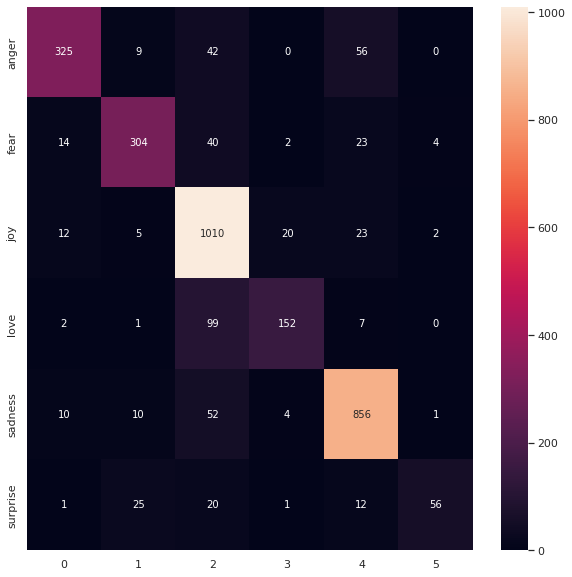

              precision    recall  f1-score   support

       anger       0.89      0.75      0.82       432
        fear       0.86      0.79      0.82       387
         joy       0.80      0.94      0.87      1072
        love       0.85      0.58      0.69       261
     sadness       0.88      0.92      0.90       933
    surprise       0.89      0.49      0.63       115

    accuracy                           0.84      3200
   macro avg       0.86      0.74      0.79      3200
weighted avg       0.85      0.84      0.84      3200



In [ ]:
from sklearn.linear_model import LogisticRegression
trained_clf_LogisticRegression = train_model(LogisticRegression(), X_train, y_train)
accuracy = get_accuracy(trained_clf_LogisticRegression,X_test, y_test)
print(f"Test dataset accuracy with LogisticRegression: {accuracy:.2f}")
get_report(trained_clf_LogisticRegression,X_test, y_test)

## SVM

Test dataset accuracy with LinearSVC: 0.84


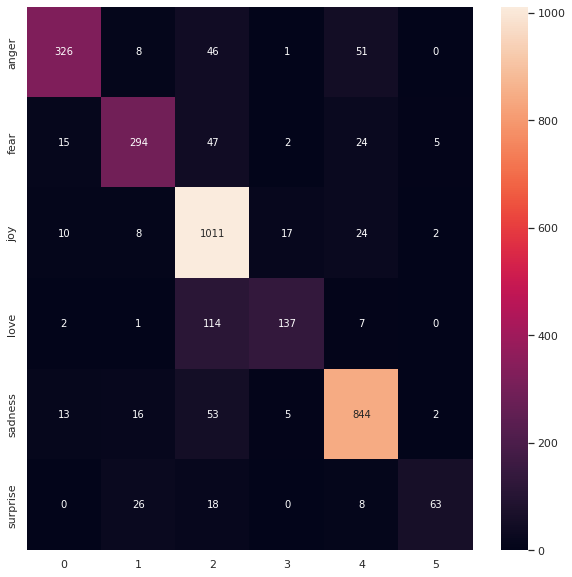

              precision    recall  f1-score   support

       anger       0.89      0.75      0.82       432
        fear       0.83      0.76      0.79       387
         joy       0.78      0.94      0.86      1072
        love       0.85      0.52      0.65       261
     sadness       0.88      0.90      0.89       933
    surprise       0.88      0.55      0.67       115

    accuracy                           0.84      3200
   macro avg       0.85      0.74      0.78      3200
weighted avg       0.84      0.84      0.83      3200



In [ ]:
from sklearn.svm import SVC
trained_clf_linearSVC = train_model(SVC(), X_train, y_train)
accuracy = get_accuracy(trained_clf_linearSVC,X_test, y_test)
print(f"Test dataset accuracy with LinearSVC: {accuracy:.2f}")
get_report(trained_clf_linearSVC,X_test, y_test)


## MLP

Iteration 1, loss = 1.39041971
Iteration 2, loss = 0.61196704
Iteration 3, loss = 0.27513683


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test dataset accuracy with MLPClassifier: 0.85


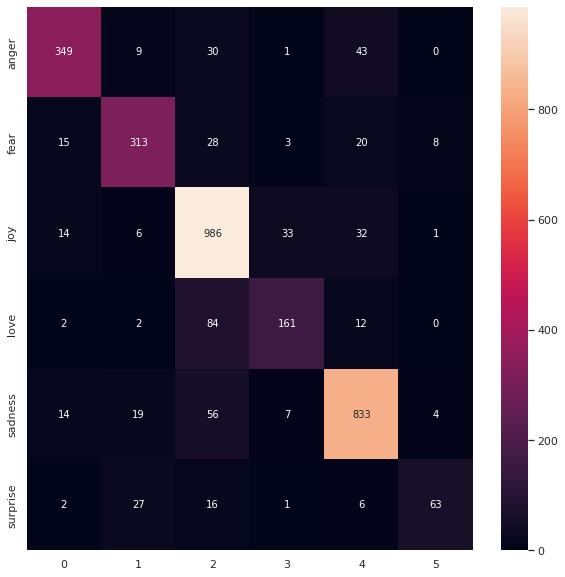

              precision    recall  f1-score   support

       anger       0.88      0.81      0.84       432
        fear       0.83      0.81      0.82       387
         joy       0.82      0.92      0.87      1072
        love       0.78      0.62      0.69       261
     sadness       0.88      0.89      0.89       933
    surprise       0.83      0.55      0.66       115

    accuracy                           0.85      3200
   macro avg       0.84      0.77      0.79      3200
weighted avg       0.85      0.85      0.84      3200



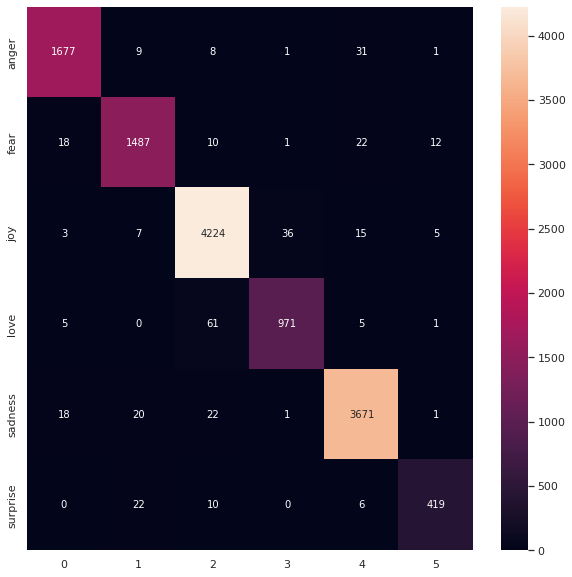

              precision    recall  f1-score   support

       anger       0.97      0.97      0.97      1727
        fear       0.96      0.96      0.96      1550
         joy       0.97      0.98      0.98      4290
        love       0.96      0.93      0.95      1043
     sadness       0.98      0.98      0.98      3733
    surprise       0.95      0.92      0.94       457

    accuracy                           0.97     12800
   macro avg       0.97      0.96      0.96     12800
weighted avg       0.97      0.97      0.97     12800



In [ ]:
from sklearn.neural_network import MLPClassifier
trained_clf_MLPClassifier = train_model(MLPClassifier(verbose=1,max_iter=3,validation_fraction=0.1), X_train, y_train)
accuracy = get_accuracy(trained_clf_MLPClassifier,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_MLPClassifier,X_test, y_test)
get_report(trained_clf_MLPClassifier,X_train, y_train)

## Decision Tree

Test dataset accuracy with MLPClassifier: 0.80


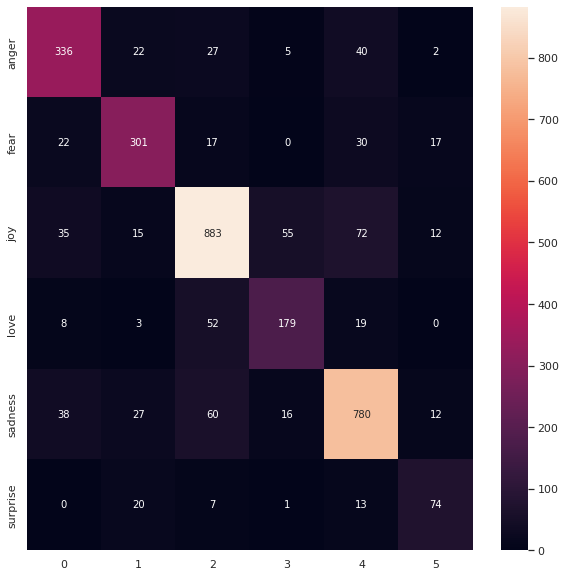

              precision    recall  f1-score   support

       anger       0.77      0.78      0.77       432
        fear       0.78      0.78      0.78       387
         joy       0.84      0.82      0.83      1072
        love       0.70      0.69      0.69       261
     sadness       0.82      0.84      0.83       933
    surprise       0.63      0.64      0.64       115

    accuracy                           0.80      3200
   macro avg       0.76      0.76      0.76      3200
weighted avg       0.80      0.80      0.80      3200



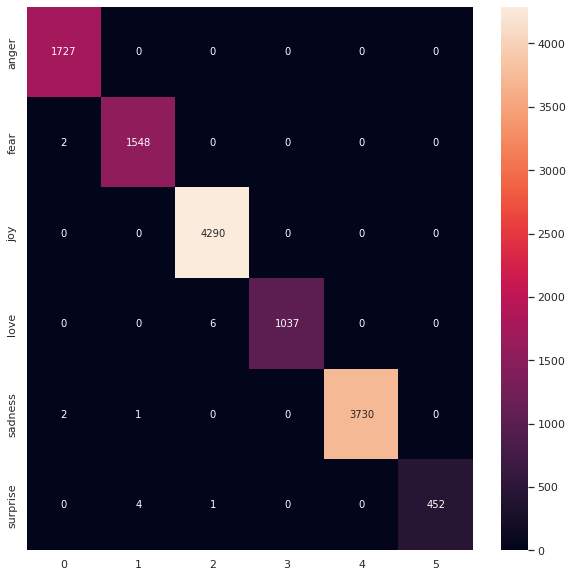

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1727
        fear       1.00      1.00      1.00      1550
         joy       1.00      1.00      1.00      4290
        love       1.00      0.99      1.00      1043
     sadness       1.00      1.00      1.00      3733
    surprise       1.00      0.99      0.99       457

    accuracy                           1.00     12800
   macro avg       1.00      1.00      1.00     12800
weighted avg       1.00      1.00      1.00     12800



In [ ]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_DT = train_model(DecisionTreeClassifier(), X_train, y_train)
accuracy = get_accuracy(trained_clf_DT,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_DT,X_test, y_test)
get_report(trained_clf_DT,X_train, y_train)

## RAndom Forest

Test dataset accuracy with MLPClassifier: 0.87


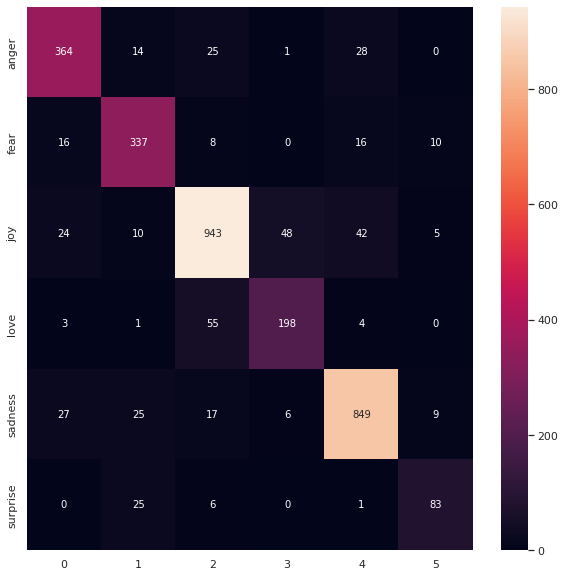

              precision    recall  f1-score   support

       anger       0.84      0.84      0.84       432
        fear       0.82      0.87      0.84       387
         joy       0.89      0.88      0.89      1072
        love       0.78      0.76      0.77       261
     sadness       0.90      0.91      0.91       933
    surprise       0.78      0.72      0.75       115

    accuracy                           0.87      3200
   macro avg       0.84      0.83      0.83      3200
weighted avg       0.87      0.87      0.87      3200



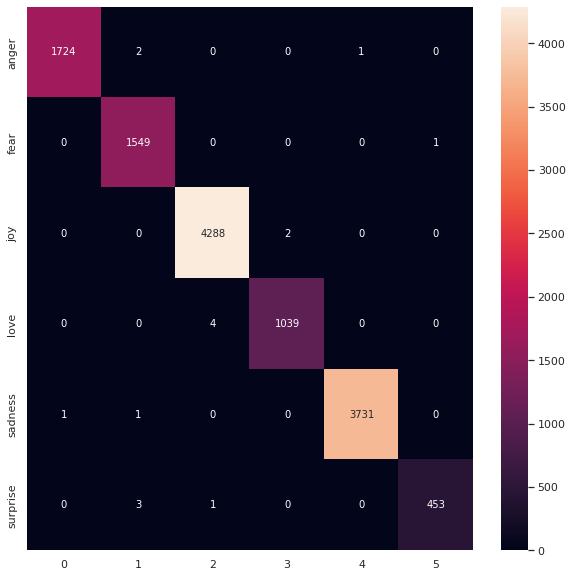

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      1727
        fear       1.00      1.00      1.00      1550
         joy       1.00      1.00      1.00      4290
        love       1.00      1.00      1.00      1043
     sadness       1.00      1.00      1.00      3733
    surprise       1.00      0.99      0.99       457

    accuracy                           1.00     12800
   macro avg       1.00      1.00      1.00     12800
weighted avg       1.00      1.00      1.00     12800



In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_RF = train_model(RandomForestClassifier(n_estimators=200), X_train, y_train)
accuracy = get_accuracy(trained_clf_RF,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_RF,X_test, y_test)
get_report(trained_clf_RF,X_train, y_train)